In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , RobustScaler , MinMaxScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBClassifier

In [4]:
data = pd.read_excel('Data_Train.xlsx')

In [5]:
df = pd.DataFrame(data)

In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [19]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [20]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10683, dtype: bool

In [21]:
df.drop_duplicates(keep='first',inplace=True)

In [22]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [23]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [26]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [30]:
df["Additional_Info"].value_counts()

Additional_Info
No info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [29]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [31]:
df.drop(columns=['Route'], inplace=True)

In [32]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,7h 50m,1 stop,No info,8625


In [33]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [34]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_30724\3142719428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302


In [36]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

extract and convert the hour portion of a duration string into an integer

In [38]:
def parse_duration(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip())
    return hours * 60 + minutes

In [39]:
df['Duration'] = df['Duration'].apply(parse_duration)

In [40]:
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10463, dtype: int64

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,170,0.0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,445,2.0,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,04:25 10 Jun,1140,2.0,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,325,1.0,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,21:35,285,1.0,No info,13302


In [42]:
def parse_arrival_time(row):
    try:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M %d %b')
    except ValueError:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M')

In [43]:
df['Arrival_Time'] = df.apply(parse_arrival_time, axis=1)

In [44]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,1900-03-22 01:10:00,170,0.0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50,1900-01-01 13:15:00,445,2.0,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,1900-06-10 04:25:00,1140,2.0,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,1900-01-01 23:30:00,325,1.0,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,1900-01-01 21:35:00,285,1.0,No info,13302


In [45]:
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [46]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,1900-03-22 01:10:00,170,0.0,No info,3897,1,10
1,Air India,2019-05-01,Kolkata,Banglore,05:50,1900-01-01 13:15:00,445,2.0,No info,7662,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,1900-06-10 04:25:00,1140,2.0,No info,13882,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,1900-01-01 23:30:00,325,1.0,No info,6218,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,1900-01-01 21:35:00,285,1.0,No info,13302,21,35


In [47]:
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [48]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,170,0.0,No info,3897,1,10
1,Air India,2019-05-01,Kolkata,Banglore,05:50,445,2.0,No info,7662,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,1140,2.0,No info,13882,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,325,1.0,No info,6218,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,285,1.0,No info,13302,21,35


In [49]:
df['Dep_Time'] = df['Dep_Time'].str.strip()

In [52]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute


In [53]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_hour,Dep_min,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,1,10,22,20,22,20
1,Air India,2019-05-01,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,13,15,5,50,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,4,25,9,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,23,30,18,5,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,21,35,16,50,16,50


In [54]:
df.drop(columns=["Dep_Time" , "Dep_hour" , "Dep_min"], axis = 1, inplace = True)

In [55]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50


In [56]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [57]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,2019-05-01,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3


In [58]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [59]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3


In [60]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

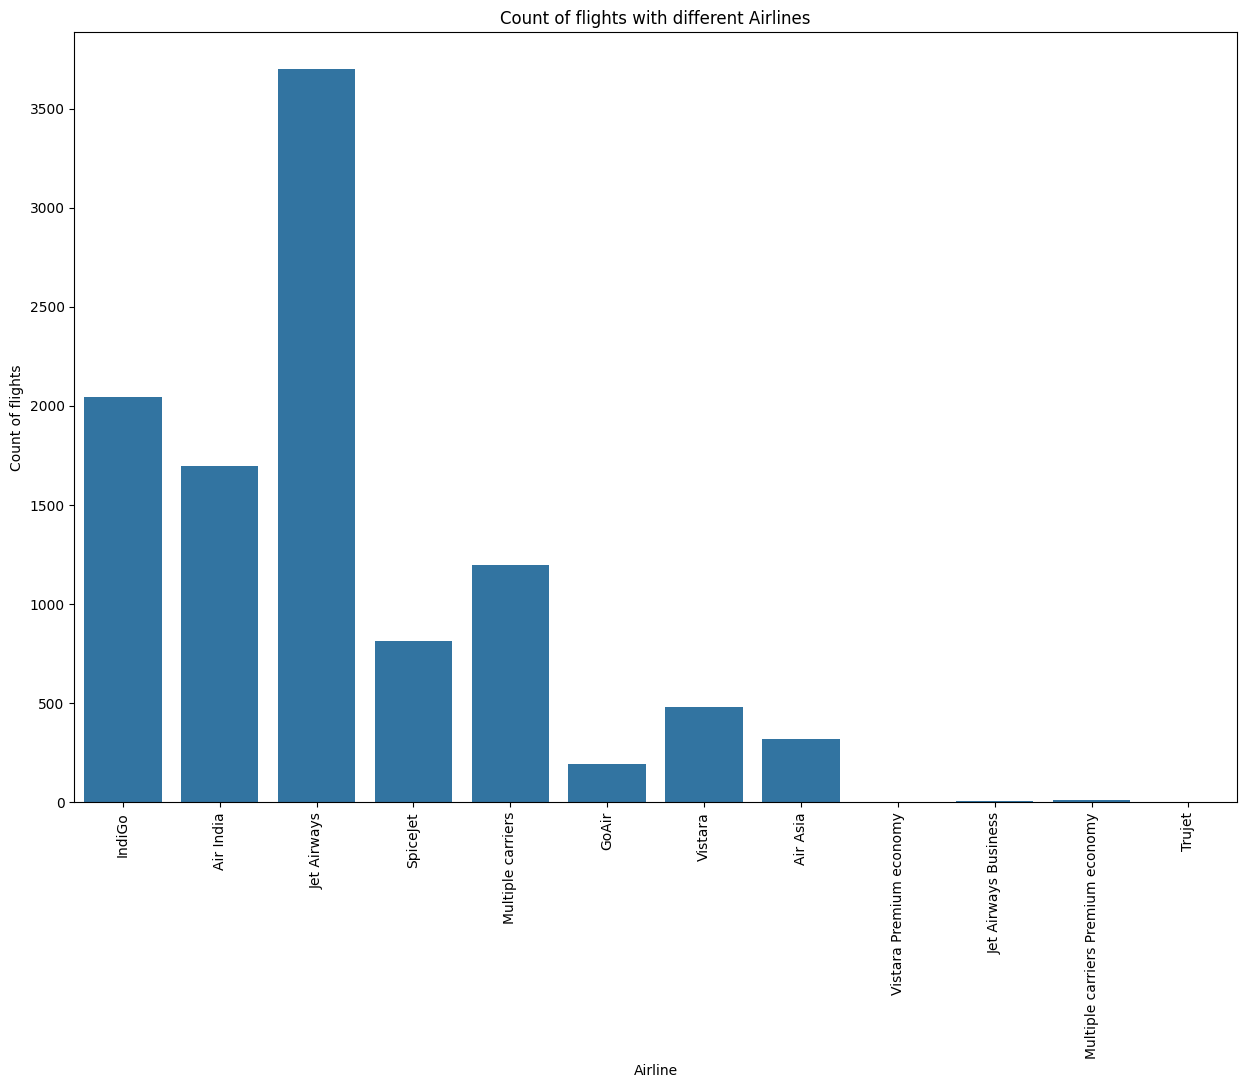

In [65]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

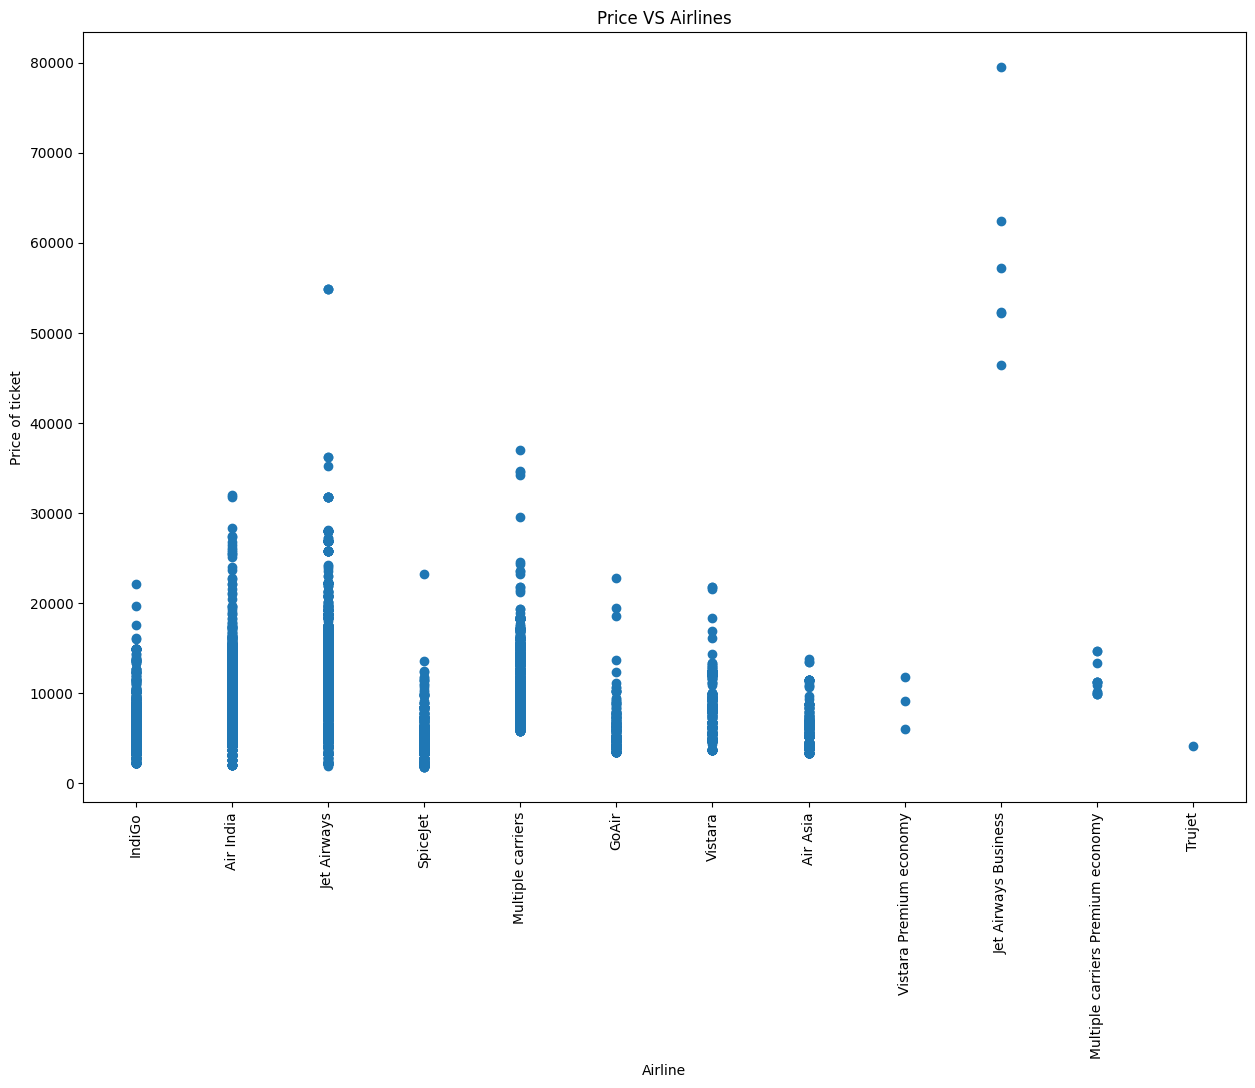

In [72]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)


In [78]:
px.histogram(data_frame=df , x = "Source")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Source=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Banglore', 'Kolkata', 'Delhi', ..., 'Banglore', 'Banglore', 'Delhi'],
                         shape=(10463,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Source'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [79]:
df['Source'].value_counts()

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [80]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3


In [81]:
df['Destination'].value_counts()

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [82]:
px.histogram(data_frame=df , x = "Destination")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Destination=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['New Delhi', 'Banglore', 'Cochin', ..., 'Delhi', 'New Delhi', 'Cochin'],
                         shape=(10463,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Destination'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [84]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,21,35,16,50,1,3
5,SpiceJet,Kolkata,Banglore,145,0.0,No info,3873,11,25,9,0,24,6
6,Jet Airways,Banglore,New Delhi,930,1.0,In-flight meal not included,11087,10,25,18,55,12,3
7,Jet Airways,Banglore,New Delhi,1265,1.0,No info,22270,5,5,8,0,1,3
8,Jet Airways,Banglore,New Delhi,1530,1.0,In-flight meal not included,11087,10,25,8,55,12,3
9,Multiple carriers,Delhi,Cochin,470,1.0,No info,8625,19,15,11,25,27,5


In [85]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [86]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Arrival_Hour', 'Arrival_Minute',
       'Dep_Hour', 'Dep_Minute', 'Journey_Day', 'Journey_Month'],
      dtype='object')

In [87]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10463 non-null  object 
 1   Source           10463 non-null  object 
 2   Destination      10463 non-null  object 
 3   Duration         10463 non-null  int64  
 4   Total_Stops      10462 non-null  float64
 5   Additional_Info  10463 non-null  object 
 6   Arrival_Hour     10463 non-null  int32  
 7   Arrival_Minute   10463 non-null  int32  
 8   Dep_Hour         10463 non-null  int32  
 9   Dep_Minute       10463 non-null  int32  
 10  Journey_Day      10463 non-null  int32  
 11  Journey_Month    10463 non-null  int32  
dtypes: float64(1), int32(6), int64(1), object(4)
memory usage: 817.4+ KB


In [88]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [89]:
Num_Columns.head()

,Duration,Total_Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,170,0.0,1,10,22,20,24,3
1,445,2.0,13,15,5,50,1,5
2,1140,2.0,4,25,9,25,9,6
3,325,1.0,23,30,18,5,12,5
4,285,1.0,21,35,16,50,1,3


In [90]:
Cat_Columns.head()

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info


In [91]:
Num_Columns.isnull().sum()

Duration          0
Total_Stops       1
Arrival_Hour      0
Arrival_Minute    0
Dep_Hour          0
Dep_Minute        0
Journey_Day       0
Journey_Month     0
dtype: int64

In [92]:
Cat_Columns.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
dtype: int64

In [93]:
x.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
dtype: int64

In [94]:
y.isnull().sum()

np.int64(0)

In [95]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Imputer" , SimpleImputer(strategy='most_frequent')))
Cat_Steps.append(("Cat_Encoder" , OneHotEncoder(sparse_output=False , drop='first')))
Cat_Pipeline = Pipeline(steps= Cat_Steps)

In [99]:
Num_Steps = list()
Num_Steps.append(("Num_Imputer" , KNNImputer(n_neighbors=2)))
Num_Steps.append(("Scaler" , StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [100]:
Transformer = ColumnTransformer(transformers=[('Num' , Num_Pipeline , Num_Columns.columns) , 
                                              ('Cat' , Cat_Pipeline , Cat_Columns.columns) ] , remainder='passthrough')

In [109]:
Transformer

e:\FCI\4th year\1\Machine Learning\Machine Learning\Machine Projects\Final_project_lab\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




ColumnTransformer(remainder='passthrough',
                  transformers=[('Num',
                                 Pipeline(steps=[('Num_Imputer',
                                                  KNNImputer(n_neighbors=2)),
                                                 ('Scaler', StandardScaler())]),
                                 Index(['Duration', 'Total_Stops', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Journey_Day', 'Journey_Month'],
      dtype='object')),
                                ('Cat',
                                 Pipeline(steps=[('Cat_Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Cat_Encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['Airline', 'Source', 'Destination', 'Additional_Info'], dtype='object'))])